<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Trabajo Fin de Master</header1></center>
<left><h1>5. Desarrollo específico de la contribución</header1></left>

**Presentado por:  Andres Mauricio Triana Sanchez** <br>
**Fecha: 20/06/2024**

## Importación de librerias necesarias

In [1]:
# Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pydotplus
import seaborn as sns
import numpy as np
# Importamos hvplot - Api graficación para Panda. Gráficos dinámicos
import hvplot.pandas
import os
# Se ignroran los mensajes warnings
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

In [2]:
# Código para cargar el Dataset
url = 'dataregresion.xlsx'
dataregresion = pd.read_excel(url)

## Modelo RandomForestRegressor() - Algoritmo de Regresión

**Preprocesamiento del dataset.**

>- Se crean dos conjuntos de datos:<br>
**X** para las variables de entrada, sin el atributo **totalTransactions**<br>
**y** con la variable objetivo/salida(**totalTransaction**)
>- Se normaliza X, ya que el conjunto de datos es disperso y asimetrico en sus atributos

In [4]:
# Se elimina la varibale objetivo para el conjunto de datos X
X = dataregresion.drop(['totalTransactions'], axis=1)
# Se crea el conjunto de datos y con la variable objetivo
y = dataregresion['totalTransactions']

In [5]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X=pd.DataFrame(X, columns=dataregresion.columns.drop('totalTransactions'))

In [6]:
# Velidamos el conjunto de datos X
X.head(10)

,Month,tenant-id,vendor-id,documentType-id,totalInvoiceNet
0,1,4,9,3,52.09029
1,1,4,10,1,177.74278
2,1,4,13,1,350.79980
3,1,4,14,1,20.14600
4,1,4,17,1,12.73039
5,1,4,18,1,42.63870
6,1,4,19,1,16.10337
7,1,4,23,3,0.23920
8,1,4,26,1,57.43577
9,1,4,27,1,8.53015


In [7]:
# Velidamos el conjunto de datos y
y.head(10)

0     1
1    29
2    17
3     2
4    13
5    14
6     9
7     1
8    10
9     2
Name: totalTransactions, dtype: int64

**División del dataset en datos de entrenamiento y datos de test**

In [8]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

>- La estrategia de evaluación es 70% para el entrenamiento y 30% para la validación del conjunto de datos
>- Con random_state=1, se obtiene el mismo conjunto de datos de entrenamiento y validacion en diferentes ejecuciones

**Dimensionalidad del conjunto de datos de entranamiento y validacion**

In [9]:
#Dimensionalidad del conjunto de datos de entrenamiento y validación
print('Conjunto de datos de Entrenamiento', X_train.shape)
print('Conjunto de datos Variable Objetivo Entrenamiento \'totalTransactions\'', Y_train.shape)
print('Conjunto de datos de Validación', X_validation.shape)
print('Conjunto de datos Variable Objetivo Validacion \'totalTransactions\'', Y_validation.shape)

Conjunto de datos de Entrenamiento (35870, 5)
Conjunto de datos Variable Objetivo Entrenamiento 'totalTransactions' (35870,)
Conjunto de datos de Validación (15373, 5)
Conjunto de datos Variable Objetivo Validacion 'totalTransactions' (15373,)


**Ajuste del modelo de regresión propuesto**

>- RandomForestRegressor(), con el fin de obtener una exactitud mas precisa al combinar N arboles de decisión. Recurso computacional: todos los procesadores n-jobs: -1. Criterio: 'squared_error' por defecto.
>- n_estimators (número de arboles) por defecto 100. 
>- El parametro 'random_state=1' es para generar el mismo resultado a predecir en cada ejecución

**Se cargan los algoritmos:** Se crea una lista con los algoritmos a comparar

In [10]:
#Carga de Algoritmos
models = []
models.append(('RFR', RandomForestRegressor(n_jobs=-1, random_state=1, n_estimators=100)))

In [11]:
#models[i][0] = Nombre modelo
#models[i][1] = Modelo
for name, model in models:
    print('Modelo =', name, " - ", model)
    model

Modelo = RFR  -  RandomForestRegressor(n_jobs=-1, random_state=1)


In [12]:
#Confirmamos las caracteristicas del modelo
models[0][1]

RandomForestRegressor(n_jobs=-1, random_state=1)

**Se crean listas para guardar los resultados a comparar:** 

In [13]:
# Listas para guardar resultados y nombre del algoritmo
prediccionTrain = []
prediccionTest = []

In [14]:
# Entrenamos el modelo
models[0][1].fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [15]:
# Se prueba el modelo
prediccionTrain.append(models[0][1].predict(X_train))
prediccionTest.append(models[0][1].predict(X_validation))

In [17]:
# Visualizamos las primeras 20 predicciones para Entrenamiento
prediccionTrain[0][:20]

array([ 2.12, 22.01,  1.37,  1.29,  2.39,  8.45,  1.23,  3.27,  1.57,
        1.04,  3.55,  5.85,  1.  ,  1.97,  7.53,  1.06,  6.28,  1.04,
       16.44, 15.31])

In [18]:
# Visualizamos las primeras 20 predicciones para Validacion
prediccionTest[0][:20]

array([ 1.09,  1.49,  1.42, 20.39,  1.14,  1.94,  2.55,  1.05,  3.22,
        2.71,  2.25,  1.84,  1.52,  2.11,  1.14,  1.74,  3.91,  1.42,
        1.38,  1.43])

In [27]:
print('Predicción de ejemplo variable Objetivo totalTransactions')
print('RandomForestRegressor =', models[0][1].predict([[5, 59, 16, 1, 300]]))
print('RandomForestRegressor =', models[0][1].predict([[8, 14, 5, 2, 500]]))
print('RandomForestRegressor =', models[0][1].predict([[9, 12, 112, 3, 1000]]))
print('RandomForestRegressor =', models[0][1].predict([[10, 34, 399, 4, 1500]]))
print('RandomForestRegressor =', models[0][1].predict([[12, 11, 16, 5, 2000]]))

Predicción de ejemplo variable Objetivo totalTransactions
RandomForestRegressor = [51.07]
RandomForestRegressor = [24.39]
RandomForestRegressor = [77.04]
RandomForestRegressor = [40.82]
RandomForestRegressor = [117.22]


**Evaluación Modelo RandomForestRegressor()**

In [28]:
#Código para mostrar la comparación de métricas de desempeño
for i in range(1):
    print("----- Model Evaluation (totalTransactions)",models[i][0]," -----")
    print("R2 Entrenamiento:", metrics.r2_score(Y_train,prediccionTrain[i]))
    print("R2 Validación:", metrics.r2_score(Y_validation,prediccionTest[i]))
    print("MAE Entrenamiento:",metrics.mean_absolute_error(Y_train,prediccionTrain[i]))
    print("MAE Validacion:",metrics.mean_absolute_error(Y_validation,prediccionTest[i]))
    print("MSE Entrenamiento:",metrics.mean_squared_error(Y_train,prediccionTrain[i]))
    print("MSE Validacion:",metrics.mean_squared_error(Y_validation,prediccionTest[i]))
    print("RMSE Entrenamiento:",np.sqrt(metrics.mean_squared_error(Y_train,prediccionTrain[i])))
    print("RMSE Validacion:",np.sqrt(metrics.mean_squared_error(Y_validation,prediccionTest[i])))
    print("\n")

----- Model Evaluation (totalTransactions) RFR  -----
R2 Entrenamiento: 0.9609500933967488
R2 Validación: 0.8936915099716293
MAE Entrenamiento: 1.223282687482576
MAE Validacion: 3.2555369804202168
MSE Entrenamiento: 82.09695190688598
MSE Validacion: 384.6105684316659
RMSE Entrenamiento: 9.060736830241014
RMSE Validacion: 19.611490724360195




**Gráficamos los Valores Reales y de Predicción del conjunto de datos para la validación de cada modelo**

In [20]:
# Random Forrest Regressor
pd.DataFrame({'Valores-Reales-Validacion': Y_validation, 'Valores-Prediccion': prediccionTest[0]}).hvplot.scatter(x='Valores-Reales-Validacion', y='Valores-Prediccion',
               c='Valores-Prediccion',legend="bottom", title="RandomForrestRegressor()")

:Scatter   [Valores-Reales-Validacion]   (Valores-Prediccion)

**Graficamos el Error en la predicción con los datos de validación**

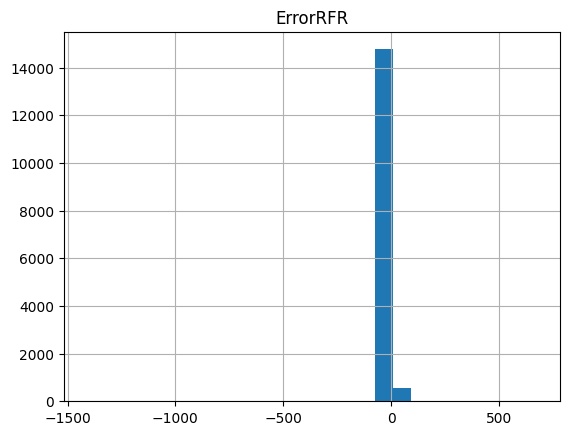

In [21]:
#Graficammos el error
error = pd.DataFrame({"ErrorRFR": prediccionTest[0]-Y_validation})
error.hist(bins = 25)
pyplot.show()

**Se Comparan las predicciones con un diagrama de cajas y bigotes**

In [23]:
names=list()
names.append('RFR')

In [24]:
tmp = pd.DataFrame({"RFR": prediccionTest[0]})

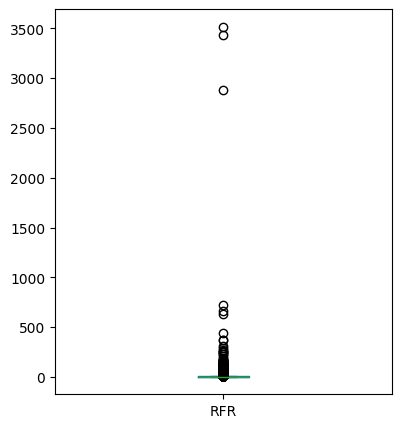

In [25]:
tmp.plot(kind='box', figsize=(20,5), subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

## Evaluación detallada del Modelo RandomForestRegressor()